In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer #convert text data to numeric#
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
#Data collection#
raw_mail_data=pd.read_csv('C:/Users/anike/OneDrive/Desktop/mail_data.csv')

print(raw_mail_data)

#Checking for Null values
raw_mail_data.isnull().sum()

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


Category    0
Message     0
dtype: int64

In [5]:
#Replace Null values with null string
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')

mail_data.head()
mail_data.shape #gives number of rows, here 5572 #

(5572, 2)

<Axes: xlabel='Category', ylabel='count'>

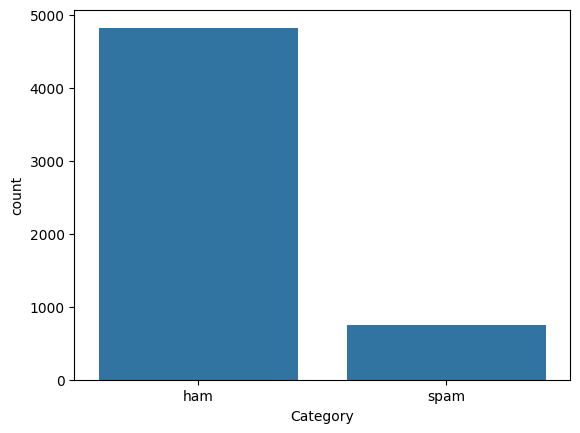

In [9]:
import seaborn as sns
sns.countplot(x='Category',data=mail_data)

# Oversampling to make the dataset Balanced #

In [12]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = mail_data['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in mail_data['Category'].unique():
    category_data = mail_data[mail_data['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
mail_data = pd.concat(balanced_data)

<Axes: xlabel='Category', ylabel='count'>

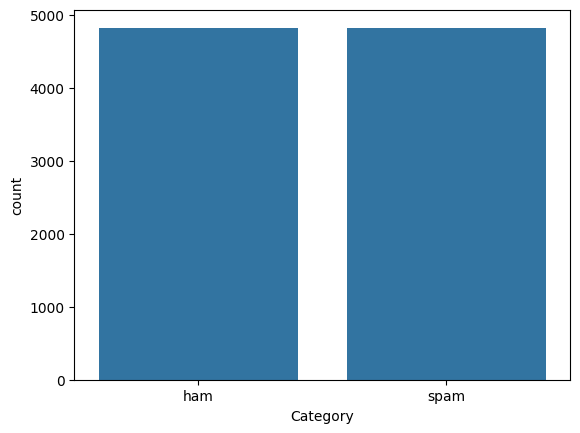

In [14]:
import seaborn as sns
sns.countplot(x='Category',data=mail_data)

In [16]:
#Now change Ham and Spam string to numeric 0 and 1,using LabelEncoder from sklearn,spam=0,ham=1#
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(mail_data['Category'])
Category=encoder.transform(mail_data['Category'])
mail_data['Category']=Category
mail_data.head()

,Category,Message
3714,0,If i not meeting ü all rite then i'll go home ...
1311,0,"I.ll always be there, even if its just in spir..."
548,0,"Sorry that took so long, omw now"
1324,0,I thk 50 shd be ok he said plus minus 10.. Did...
3184,0,Dunno i juz askin cos i got a card got 20% off...


In [18]:
#Segregating features and target#
X=mail_data['Message']
Y=mail_data['Category']

print(X)
print(Y)


3714    If i not meeting ü all rite then i'll go home ...
1311    I.ll always be there, even if its just in spir...
548                      Sorry that took so long, omw now
1324    I thk 50 shd be ok he said plus minus 10.. Did...
3184    Dunno i juz askin cos i got a card got 20% off...
                              ...                        
4248    Text PASS to 69669 to collect your polyphonic ...
3675    You have won a Nokia 7250i. This is what you g...
3620    8007 25p 4 Alfie Moon's Children in Need song ...
3501    Dorothy@kiefer.com (Bank of Granite issues Str...
4237    U can WIN £100 of Music Gift Vouchers every we...
Name: Message, Length: 9650, dtype: object
3714    0
1311    0
548     0
1324    0
3184    0
       ..
4248    1
3675    1
3620    1
3501    1
4237    1
Name: Category, Length: 9650, dtype: int32


In [20]:
#Seggregating Training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9650,)
(7720,)
(1930,)


# Feature Extraction : Text to numeric #

In [23]:
#convert text mssg to numerical value,   Feature Extraction     #

#transform text data to feature vectors(numerical val),to feed our logistic regression model#

#go through all words ,then recognizes repeated words and tries to find some pattern and gives some score based on freq of occurence of words# 
#if a word is repeated more times it will give that a score, if a word is repeated less it will give it a different score#
#min_df=1,if a word is occuring less than or equal to 1 then ignore,only consider word that occurs more than once#
#stopwords would ignore is,the,in etc that are meaning less but appear multiple times#

feature_extraction=TfidfVectorizer(min_df = 1 ,stop_words='english' , lowercase=True)
feature_extraction.fit(X_train)
X_train_features=feature_extraction.transform(X_train)
X_test_features=feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers#

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

print(X_train_features)

  (0, 7430)	0.2730785477088975
  (0, 7226)	0.2535455281094931
  (0, 7094)	0.16184679738801236
  (0, 6995)	0.15903125109535068
  (0, 4636)	0.2649437846603834
  (0, 3274)	0.21144643577172506
  (0, 2995)	0.15255169126121537
  (0, 2645)	0.2649437846603834
  (0, 2475)	0.2298709765915816
  (0, 2019)	0.2903567113548037
  (0, 1746)	0.3173824965194736
  (0, 1222)	0.22635535036122495
  (0, 768)	0.28522614043057976
  (0, 595)	0.22043179486626982
  (0, 324)	0.3597006294761272
  (0, 291)	0.2298709765915816
  (1, 7136)	0.26090668788757654
  (1, 7097)	0.2136887513351646
  (1, 5364)	0.19986489327285512
  (1, 4824)	0.23534062335491282
  (1, 4527)	0.1877309314675012
  (1, 4116)	0.24131738583015447
  (1, 3998)	0.2786379971905302
  (1, 3274)	0.22147091900688992
  (1, 1870)	0.1837449411563404
  :	:
  (7717, 643)	0.26100221927141903
  (7718, 7278)	0.42626857796630174
  (7718, 6811)	0.4350936125926346
  (7718, 1959)	0.46013567784313597
  (7718, 956)	0.6459596006682733
  (7719, 7232)	0.2509804814542243
  (771

# Model Training #

In [26]:
#Now we will use X_train_features as it has numerical values#


#Train the Machine Learning Model,logistic regression
model=LogisticRegression()
model.fit(X_train_features,Y_train)


LogisticRegression()

# Model Evaluation #

In [29]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(prediction_on_training_data,Y_train)

print('accuracy on training data is ',accuracy_on_training_data)

prediction_on_testing_data=model.predict(X_test_features)
accuracy_on_testing_data=accuracy_score(prediction_on_testing_data,Y_test)

accuracy on training data is  0.9963730569948187


In [31]:
prediction_on_testing_data=model.predict(X_test_features)
accuracy_on_testing_data=accuracy_score(prediction_on_testing_data,Y_test)
print('accuracy on testing data is ',accuracy_on_testing_data)

accuracy on testing data is  0.9901554404145078


# K fold Cross validation #

In [34]:
# Doing 10 fold cross validation 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

cv_scores = cross_val_score(model, X_train_features, Y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores and mean score


print("Cross-validation scores for each fold: ", cv_scores)
print("Mean cross-validation accuracy: ", np.mean(cv_scores))

Cross-validation scores for each fold:  [0.98834197 0.98963731 0.98834197 0.99093264 0.9857513  0.99352332
 0.99222798 0.99222798 0.99222798 0.99352332]
Mean cross-validation accuracy:  0.9906735751295337


# Sensitivity,Specificity and Precision #

In [37]:
#generate confusion matrix#
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,prediction_on_testing_data)

# Extract true positives and true negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):",fn)
print("False Positives (FP):",fp)

#calculate accuracy metric i.e sensitivity,specificity,recall and precision
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0



print("Specificity is ",specificity)
print("Sensitivity is ",sensitivity)
print("Precision is ",precision)


True Positives (TP): 969
True Negatives (TN): 942
False Negatives (FN): 8
False Positives (FP): 11
Specificity is  0.9884575026232949
Sensitivity is  0.9918116683725691
Precision is  0.9887755102040816


# AUC-ROC Curve #

AUC-score :  0.9977896659903919


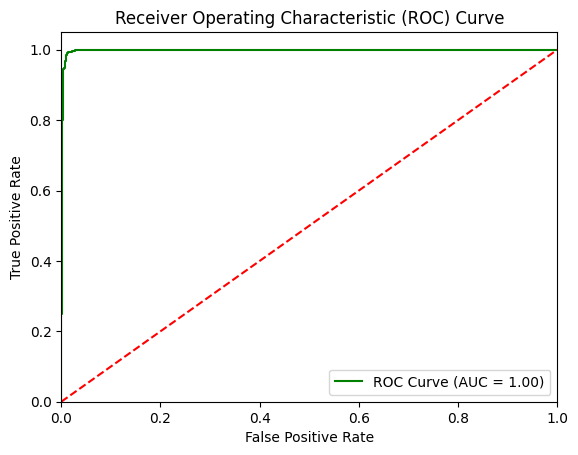

In [40]:
#ROC-Curve
from sklearn.metrics import roc_curve ,roc_auc_score
#prediction probability for test set [:, 1]#
#is to extract the predicted probabilities of the spam mail (case 1 corresponds to spam mail).

Y_prob=model.predict_proba(X_test_features)[:,1]

#Calculate the ROC curve
fpr, tpr, thresholds =roc_curve(Y_test,Y_prob)

#Calculate AUC score
auc_score=roc_auc_score(Y_test,Y_prob)

print("AUC-score : ",auc_score)

#draw the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Building The Predictive System #

In [43]:
#Building the Predictive System#

imail=str(input('Enter the mail to see if its spam or not : ') )
input_mail=[]
input_mail.append(imail)
print(input_mail)

#feature extraction , text tonumerical values #
input_data_features=feature_extraction.transform(input_mail)

#making prediction using our model#
prediction=model.predict(input_data_features)
print('\n')
if(prediction==0):
    print("The mail provided is a genuine mail ")
elif(prediction==1):
    print("The mail provided is a Spam mail ")

Enter the mail to see if its spam or not :  Dear [User’s Name],  CONGRATULATIONS! You have been selected as the winner of a $1,000,000 CASH PRIZE! This prize was randomly awarded to you among millions of users worldwide.  To claim your prize, please respond with your full name, address, phone number, and bank account details.  Hurry! This offer is only valid for 24 hours.  Best regards, Prize Coordinator [Generic Company Name] Sweepstakes


['Dear [User’s Name],  CONGRATULATIONS! You have been selected as the winner of a $1,000,000 CASH PRIZE! This prize was randomly awarded to you among millions of users worldwide.  To claim your prize, please respond with your full name, address, phone number, and bank account details.  Hurry! This offer is only valid for 24 hours.  Best regards, Prize Coordinator [Generic Company Name] Sweepstakes']


The mail provided is a Spam mail 
